#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 3
#### Topics:
- Statistical Estimation
- Hypothesis Testing in one and two samples

#### Due: 25/04/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: 

**Student ID**:

**Date**:

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (Variance Estimation)

Consider the variance estimate
$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n(y_i - \bar{y})^2. 
$$
If $Y_i \simiid \Ncal(\mu,\sigma^2)$, then 
$$
\frac{n-1}{\sigma^2}s^2 \sim \chi^2_{n-1}.
$$
1. Use this information to derive a $1-\alpha$ coinfidence interval for $\sigma^2$ (express $L$ and $U$ in terms of $s^2$, $n$, and the relevant quantiles of the $\chi^2$ distribution). 
2. For $n = 2,\ldots,10$ and $\alpha=0.05$, report on the lower ($L$) and upper ($U$) values of the coinfidence interval in terms of $s^2$. 
3. How large $n$ must be to obtain a $0.95$ coinfidence interval of size $0.1s^2$? 

The point: the number of degrees of freedom needed for a reasonable ($10\%$ range) estimate of the variance can be very large. Sometimes, much larger than our data permit.




## Solution

### Solution 1

We are given that $$\frac{n-1}{\sigma^2}s^2 \sim \chi^2_{n-1} $$
--> $$ [\chi^2_{n-1}]^{\frac{\alpha}{2}} < \frac{n-1}{\sigma^2}s^2 < [\chi^2_{n-1}]^{1-\frac{\alpha}{2}}$$
--> $$ \frac{n-1}{[\chi^2_{n-1}]^{1-\frac{\alpha}{2}}} s^2 < \sigma^2 < \frac{n-1}{[\chi^2_{n-1}]^{\frac{\alpha}{2}}} s^2 $$
</br>
--> $$ L = \frac{n-1}{[\chi^2_{n-1}]^{1-\frac{\alpha}{2}}} s^2 $$
--> $$ U = \frac{n-1}{[\chi^2_{n-1}]^{\frac{\alpha}{2}}} s^2 $$

DONE.

### Solution 2

In [21]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(style="darkgrid")
sns.set(font_scale=1.5)


In [2]:
ALPHA = 0.05

def calc_c_i_for_chi_squared(n, alpha=ALPHA, to_print=True):
    num = n - 1  
    dof = n - 1
    L = num / st.chi2.ppf(1 - alpha/2, dof)
    U = num / st.chi2.ppf(alpha/2, dof)
    if to_print:
        print(f"For n = {n}: L =    {L:.3f} * s^2,    U = {U:.3f} * s^2")
    
    return L, U


In [3]:
for n in range(2, 11):
    calc_c_i_for_chi_squared(n)

For n = 2: L =    0.199 * s^2,    U = 1018.258 * s^2
For n = 3: L =    0.271 * s^2,    U = 39.498 * s^2
For n = 4: L =    0.321 * s^2,    U = 13.902 * s^2
For n = 5: L =    0.359 * s^2,    U = 8.257 * s^2
For n = 6: L =    0.390 * s^2,    U = 6.015 * s^2
For n = 7: L =    0.415 * s^2,    U = 4.849 * s^2
For n = 8: L =    0.437 * s^2,    U = 4.142 * s^2
For n = 9: L =    0.456 * s^2,    U = 3.670 * s^2
For n = 10: L =    0.473 * s^2,    U = 3.333 * s^2


### Solution 3

In [4]:

for n in range(2, 100000):
    L, U = calc_c_i_for_chi_squared(n, to_print=False)  # this is in terms of S^2
    
    if U - L <= 0.1:
        print(f"For a CI with size 0.1 * s^2, n should be >= {n}")
        break
        

For a CI with size 0.1 * s^2, n should be >= 3082


## Problem 2 (Correlated Data)

Suppose that $Y_1,\ldots,Y_n$ has each mean $\mu$ and variance $\sigma^2$, but 
$$
\rho_{ij} := \mathrm{Corr}(Y_i,Y_j) = \begin{cases}
1 & i=j \\
\rho & |i-j| = 1 \\
0 & |i-j| > 1
\end{cases}.
$$
This situation arise when an observation $i$ may depend to some extent on only the previous observation’s white noise: an one-lag "holdeover effect". This is also known as the "lag-1 moving average" model (MA(1)). 

1. Show that:
  - $$\mathrm{Var}(\bar{Y}) = \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})$$
Namely, positive correlation increases varaince. Hint: use that $\mathrm{Var}(U+V) = \mathrm{Var}(U) + \mathrm{Var}(V) + 2 \mathrm{Cov}(U,V)$ and induction or recursive computation over $n$. Another option is to write $Y = \Sigma^{1/2}Z$ where $Z\sim \Ncal(0,I)$ and $\Sigma^{1/2}$ is symmetric with  $\Sigma^{1/2}\Sigma^{1/2} = \Sigma$ has the desired covariance stracture.  

#### Answer

We will use induction.

* Base-case  
If $n = 1$, then 
$$
var(\bar{Y_1}) = var(Y_1) = \sigma^2 = \frac{\sigma^2}{1}(1+ 2 \rho \frac{1 - 1}{1}) = \frac{\sigma^2}{1}(1 + 0) = \sigma^2
$$

* Induction Hypothisis:
We will assume Hypothisis correct for n=k.  
$$
Var(\bar{Y_n}) = \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})
$$

* Induction step:
$$ Var(\bar{Y_{n+1}} = Var(\frac{1}{n+1}\Sigma_{i=1}^{n+1}Y_i)$$

-->

$$ 
= Var(\frac{n}{n+1} \cdot \frac{1}{n} \Sigma_{i=1}^{n+1}Y_i) = (\frac{n}{n+1})^2 Var(\frac{1}{n} \Sigma_{i=1}^{n+1}Y_i)
$$

$$ 
= (\frac{n}{n+1})^2 Var(\frac{1}{n} \Sigma_{i=1}^{n}Y_i + \frac{1}{n}Y_{n+1}) = (\frac{n}{n+1})^2 [Var(\bar{Y_n}) + Var(\frac{1}{n} Y_{n+1}) + 2Cov(\bar{Y_n},\frac{1}{n} Y_{n+1})] 
$$

$$ 
= (\frac{n}{n+1})^2 [\frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n}) + \frac{1}{n^2} \sigma^2 + 2Cov(\bar{Y_n},\frac{1}{n} Y_{n+1})] 
$$

Let's isolate $ Cov(\bar{Y_n},\frac{1}{n} Y_{n+1}) $:
$$ 
Cov(\bar{Y_n},\frac{1}{n} Y_{n+1}) = \frac{1}{n^2}[Cov(Y_1,Y_{n+1}) + ... + Cov(Y_n,Y_{n+1}) = \frac{1}{n^2} (0 + ... + \rho \sigma^2) = \frac{\rho \sigma^2}{n^2} 
$$

And continue:
$$
= Var(\frac{n}{n+1} \cdot \frac{1}{n} \Sigma_{i=1}^{n+1}Y_i) = (\frac{n}{n+1})^2 [\frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n}) + \frac{1}{n^2} \sigma^2 +2\frac{\rho \sigma^2}{n^2}] 
$$

$$ 
= (\frac{n}{n+1})^2 \cdot \frac{\sigma^2}{n}[1 + 2\rho \frac{n-1}{n} + \frac{1}{n} + 2\frac{\rho}{n}] = (\frac{n\sigma^2}{(n+1)^2}) (\frac{n + 2n\rho - 2\rho + 1 +2\rho}{n}) 
$$

$$ 
= (\frac{\sigma^2}{(n+1)^2}) (n + 2n\rho + 1) = (\frac{\sigma^2}{n+1}) (\frac{n + 1 + 2n\rho}{n + 1}) = (\frac{\sigma^2}{n+1}) (1 + \frac{2n\rho}{n + 1})
$$

DONE.
<br>
<br>
<br>
<br>

  - $$\qquad \ex[{s^2}] = \sigma^2(1 - 2\rho/n)$$
  where $s^2$ is the standard varince estiamte. 
Namely, with positive correlation the "variety" in the data is smaller. 

#### Answer

Let's remember:

$$
E[s^2] = E \left[ \frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2 \right] = \frac{1}{n-1} E \left[ \sum_{i=1}^{n} {Y_i}^2 + \sum_{i=1}^{n} {\bar{Y}}^2 - \sum_{i=1}^{n} 2 Y_i \bar{Y} \right] 
$$

$$
=
\frac{1}{n-1} E \left[ \sum_{i=1}^{n} {Y_i}^2 + n {\bar{Y}}^2 - 2 \bar{Y} \sum_{i=1}^{n} Y_i \right] 
$$

$$
=
\frac{1}{n-1} E \left[ \sum_{i=1}^{n} {Y_i}^2 + n {\bar{Y}}^2 - 2 \bar{Y} n \bar{Y} \right] = \frac{1}{n-1} E \left[ \sum_{i=1}^{n} {Y_i}^2 - n {\bar{Y}}^2 \right] 
$$

$$
=
\frac{1}{n-1} \sum_{i=1}^{n} E \left[ {Y_i}^2 \right] - \frac{n}{n-1} E \left[ {\bar{Y}}^2  \right]
$$

Before, we continue let's note that:
$$
var(X) = E[X^2]-E[X]^2 --> E[X^2] = var(X) + E[X]^2 --> E[Y_i^2] = \mu^2 + \sigma^2
$$

And, continue:
$$
=
\frac{1}{n-1} \sum_{i=1}^{n} \left[ \sigma^2 + \mu^2 \right] - \frac{n}{n-1} \left[ \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n}) + \mu^2  \right]
$$

$$
=
\frac{1}{n-1} \left[ n \sigma^2 + n \mu^2 -n \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n}) - n \mu^2  \right]
$$

$$
=
\frac{\sigma^2}{n-1} \left[ n - 1 - 2\rho \frac{n-1}{n} \right] = \sigma^2 \left[ 1 - \frac{2\rho}{n} \right]
$$


DONE.
<br>
<br>
<br>
<br>

  - **(Bonus)** The t-statistic statisfies
$$
t = \sqrt{n} \frac{\bar{Y}-\mu}{s} \to \Ncal(0,1 + 2 \rho),\quad n \to \infty
$$
Hint: you may use the following version of Slutsky's Theorem: for two sequences of RV U_n and V_n, if $U_n \overset{D}{\to} U$ and $V_n \overset{p}{\to} c$ (constant), then $ V_n U_n \overset{D}{\to} cU$

#### Answer

We know that for two sequences of RV U_n and V_n, if $U_n \overset{D}{\to} U$ and $V_n \overset{p}{\to} c$ (constant), then $ V_n U_n \overset{D}{\to} cU$

#### TODO

In [5]:


def genrate_correlated_data(n: int, rho: float, mu: float, sigma: float) -> np.ndarray:
    """
    Generate samples from the model:
    Yi ~ N(mu, sigma^2) and Corr(Yi,Yj) = ( i == j ) + rho * ( abs( i - j ) == 1 )
    
    Args:
    -----
    :n:     sample size
    :rho:   desired one lag correlation between samples
    :mu:    mean
    :sigma: standard deviation
    
    """
    assert sigma > 0
    
    # build desired covariance matrix
    Sig = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i==j : 
                Sig[i,j] = 1
            if np.abs(i-j) == 1:
                Sig[i,j] = rho
                Sig[j,i] = rho
                
    # get matrix square root of covariance matrix:
    Sig_sqrt = np.linalg.cholesky(sigma**2 * Sig)
    
    # sample from the standard normal dist. and transform 
    # so that the result is a normal vector with the desired 
    # covaraince structure
    return mu + Sig_sqrt @ np.random.randn(n)


2. Verify your answer to the first two items in 1 using simulations. Use `nMonte = 10000` problem instances. In each instance, use a sample size of `n = 10` with $\sigma=1$ and $\rho \in \{\pm 0.1, \pm 0.3, \pm0.5\}$. The function `genrate_correlated_data` below generates noramlly distributed data satisfying the correlation model above. 

#### Answer

In [6]:
nMonte = 10000
n = 10
mu, sigma = 0, 1
rhos = [-0.1, 0.1, -0.3, 0.3, -0.5, 0.5]

In [7]:
for rho in rhos:    
    correlated_data = np.asarray([genrate_correlated_data(n=n, rho=rho, mu=mu, sigma=sigma) for _ in range(nMonte)])
    
    # get emprical values
    y_means = np.mean(correlated_data, axis=1).reshape(-1, 1)
    var = (1 / (n - 1)) * np.sum((correlated_data - y_means) ** 2, axis=1)
    y_means_var = np.var(y_means)
    var_mean = np.mean(var) 
    
    # calculus values
    theory_y_bar_var = sigma**2 / n * (1 + 2 * rho * (n-1) * (1/n))
    theory_sigma_squared_mean = sigma**2 * (1 - 2 * rho * (1/n))
    
    
    print(f"For rho  = {rho}\n\tThe theoretical y means var = {theory_y_bar_var:.4f}, the calculated one = {y_means_var:.4f}")
    print(f"\tThe theoretical var mean = {theory_sigma_squared_mean:.4f}, the calculated one = {var_mean:.4f}")
    print("*" * 130, "\n")

For rho  = -0.1
	The theoretical y means var = 0.0820, the calculated one = 0.0823
	The theoretical var mean = 1.0200, the calculated one = 1.0226
********************************************************************************************************************************** 

For rho  = 0.1
	The theoretical y means var = 0.1180, the calculated one = 0.1176
	The theoretical var mean = 0.9800, the calculated one = 0.9870
********************************************************************************************************************************** 

For rho  = -0.3
	The theoretical y means var = 0.0460, the calculated one = 0.0455
	The theoretical var mean = 1.0600, the calculated one = 1.0618
********************************************************************************************************************************** 

For rho  = 0.3
	The theoretical y means var = 0.1540, the calculated one = 0.1570
	The theoretical var mean = 0.9400, the calculated one = 0.9389
***************

3. Suppose $\rho>0$
 - Derive a $1-\alpha$ confidence interval based on $s$ and the $t$-distribution with $n-1$ DoF. Does your interval 
 contains the value of $\mu$ more or less often than $1-\alpha$? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$. 
 

#### Answer

In [8]:
import scipy.stats as stats


n = 100
ALPHA = 0.05
rho = 0.25
rho_negative = -1 * rho
mu, sigma = 2, 1
nMonte = 10000 

t_critic = stats.t.ppf(1 - ALPHA / 2, df=n-1)

is_mu_in_ci_list, is_h0_rejected_larger_list, is_h0_rejected_regular_list = list(), list(), list()

for _iteration in range(nMonte):
    correlated_data = genrate_correlated_data(n=n, rho=rho, mu=mu, sigma=sigma)
    y_mean = np.mean(correlated_data)
    s_squared = np.sum((correlated_data - y_mean) ** 2) / (n-1)
    s = np.sqrt(s_squared)
    
    # calculate CI
    L = mu - s / np.sqrt(n) * t_critic
    U = mu + s / np.sqrt(n) * t_critic
    
    # calculate t statistic
    t_statistic_larger = np.sqrt(n) * (y_mean - mu) / s
    t_statistic_regular = np.sqrt(n) * abs(y_mean - mu) / s

    # check if you reject H0:
    is_h0_rejected_larger = t_statistic_larger > t_critic
    is_h0_rejected_larger_list.append(is_h0_rejected_larger)

    is_h0_rejected_regular = t_statistic_regular > t_critic
    is_h0_rejected_regular_list.append(is_h0_rejected_regular)

    # check if mean is in Confidence Interval:
    is_mu_in_ci = L <= y_mean <= U
    is_mu_in_ci_list.append(is_mu_in_ci)

# calculate ratios
mu_in_ci_ratio = np.sum(is_mu_in_ci_list) / nMonte
h0_rejected_ratio_regular = np.sum(is_h0_rejected_regular_list) / nMonte
h0_rejected_ratio_larger = np.sum(is_h0_rejected_larger_list) / nMonte


print("*" * 130, "\n")
print(f"For rho = {rho}, real mu appears in CI {mu_in_ci_ratio*100:.2f}% of the times, and the expected is {(1-ALPHA)*n}% of the times\n")
print(f"If we reject H0 whenever t-statistic exceeds the critical value t-critic, we would reject H0 {h0_rejected_ratio_larger*100:.2f}% of the times\n")
print("Obviously, the number of rejections under this model will be lower, probably by ~ half.")
print(f"And to be precise, we'd reject under a normal rejection model (abs(t-statistic) > t_critic) {h0_rejected_ratio_regular*100:.2f}% of the times\n")
print(f"And as we thought, this model will reject {h0_rejected_ratio_larger/h0_rejected_ratio_regular*100:.2f}% of the times the regular model would reject.")
print("*" * 130, "\n")
                    
                    

********************************************************************************************************************************** 

For rho = 0.25, real mu appears in CI 89.31% of the times, and the expected is 95.0% of the times

If we reject H0 whenever t-statistic exceeds the critical value t-critic, we would reject H0 5.24% of the times

Obviously, the number of rejections under this model will be lower, probably by ~ half.
And to be precise, we'd reject under a normal rejection model (abs(t-statistic) > t_critic) 10.69% of the times

And as we thought, this model will reject 49.02% of the times the regular model would reject.
********************************************************************************************************************************** 



We see the the postive rho causes us to reject more H0 (because it's not in the CI more).

 - Suppose that we reject $H_0\,:\,\mu = \mu_0$ whenever $t$ exceeds the critical value $t_{n-1}^{1-\alpha/2}$. Would our P-value be too small or too large? Would we reject more or less often then $\alpha$ if the null $\mu = \mu_0$ is true? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$. 
 

#### Answer

As we printed above, we would reject less (about half the time) compared to a regular rejection model (see above). The p-value, will be too large in case of the t statistic will be lower than the negative of the t-critic. SO it would either not change, or be larger. 
<br>

 - Would your answer to the preivous two items change if $\rho < 0$? how?

The point: correlation in our data is bad because it makes us make wrong descisions. The effect of correlation is much worst than non-nomrality since the latter diminishes with $n$ due to the CLT. 

#### Answer

Yes, it would. It would be the opposite; Namely, it would cause mu to be more time in the CI than the expected and reject H0 less. It wouldn't change the answer to the last question, the p-value answer would still be the same. 

## Problem 3 (Regression and Hypothesis Testing)

The dataset for this problem is available in the file temp_TLV_beach.csv, which was taken directly from the meterological service website (https://ims.data.gov.il/ims/1). 

We consider monitoring changes in rainfall/precipitation over the years at Station 136320 located at Tel-Aviv beach area. 
To do so, we will set up a standard linear model with $p = 3$ features, where for dates (times) $t \in \{0,1,\ldots,366\}$ (we have 366 for leap years) we set
$$
y_t = \beta_0 + \beta_1 \cos( 2\pi(t/365)) + \beta_2 \sin( 2\pi(t/365)) + \epsilon_t,\qquad t=1,\ldots,n. 
\label{eq:model} \tag{2}
$$
(note that the dataset does not contain measurments from all days in the range)

1) Set $y_t = \texttt{Rainfall}$. 
 - Plot $y_t$ versus $t=$`Date` and identify winter times.

- Find the LS regression coefficients $\beta$; plot the fitted response $\hat{y}_t$ over time along with the original response $y_t$. 

 - Test whether the fitted model significantly improves on the trival model $y_t = \beta'_0 + \epsilon_t$.
 
 - For each parameter $p$, report the P-value for testing $H_0\,:\,\hat{\beta}_p = 0$ and indicate whether this parameter is 
significantly different than $0$ at level $\alpha = 0.01$. 
(for this item, you can either evaluate everything from the formulas provded in class or use a statistical package like `statsmodels`)

You may use the code below to format the `Date` column correctly and extract other relevant information from it. 

## Solution

### Solution 1

 - Plot $y_t$ versus $t=$`Date` and identify winter times.


In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


path_to_data_file = "rainfall_TLV_beach.csv"
data = pd.read_csv(path_to_data_file)

data['Date'] = pd.to_datetime(data.Date, format="%d-%m-%Y")
data['DayOfYear'] = data.Date.dt.day_of_year
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year
y = data.Rainfall.values

data.head()

,StationCode,Date,Rainfall,DayOfYear,Month,Year
0,136320,2005-10-18,0.1,291,10,2005
1,136320,2005-10-19,0.5,292,10,2005
2,136320,2005-10-20,0.1,293,10,2005
3,136320,2005-10-29,0.6,302,10,2005
4,136320,2005-10-30,5.3,303,10,2005


In [13]:
data.describe()

,StationCode,Rainfall,DayOfYear,Month,Year
count,911.0,911.000000,911.000000,911.000000,911.000000
mean,136320.0,8.142261,158.167947,5.682766,2013.697036
std,0.0,11.711135,140.061444,4.575054,4.909554
min,136320.0,0.100000,1.000000,1.000000,2005.000000
25%,136320.0,0.900000,34.500000,2.000000,2010.000000
50%,136320.0,3.400000,83.000000,3.000000,2014.000000
75%,136320.0,10.350000,319.500000,11.000000,2018.000000
max,136320.0,102.600000,366.000000,12.000000,2022.000000


Let's plot Rainfall by Date:

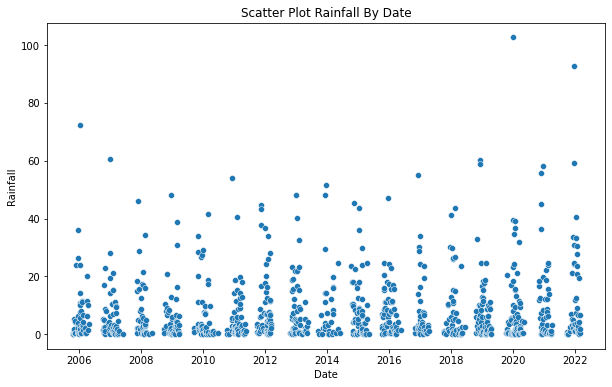

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.Date, y=y)
plt.title('Scatter Plot Rainfall by Date'.title())
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.show()

Too mush noise, we can't really indetift winter times this way.
</br>
So - let's group by month, to fully indentify the winter times:

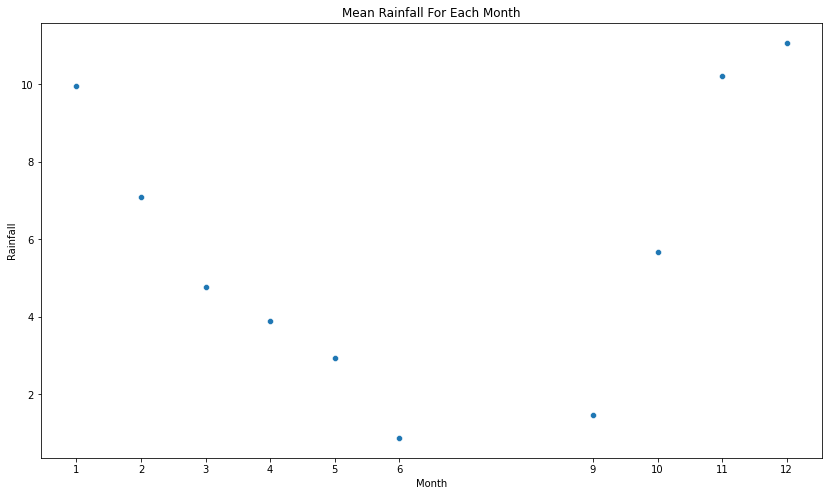

In [15]:
# create a grouped dataframe
data_to_plot = data.groupby(by="Month").mean()
data_to_plot[["Rainfall"]]

# plot the mean of the rainfall per month
months = [1, 2, 3, 4, 5, 6, 9, 10, 11, 12]  # all months in the data
plt.figure(figsize=(14, 8))
sns.scatterplot(x=months, y=data_to_plot.Rainfall)
plt.title('Mean Rainfall for each Month'.title())
plt.xlabel('Month')
plt.xticks(months)
plt.ylabel('Rainfall')
plt.show()

Let's also a boxplot of the Rainfall values, for each month

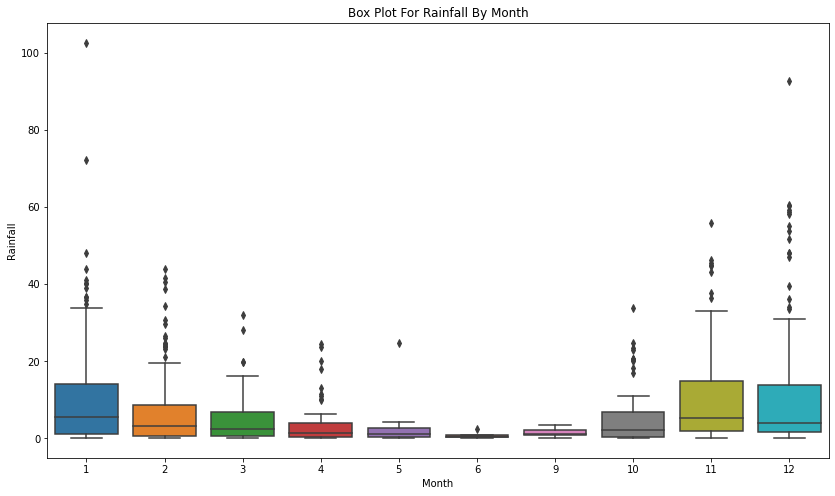

In [16]:

plt.figure(figsize=(14, 8))
sns.boxplot(x="Month", y="Rainfall", data=data)
plt.title('Box Plot for Rainfall by Month'.title())
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.show()

It seems obvious that winter is at (we didn't really define it mathematically - so I'll define it as the 4 months with the highest mean Rainfall):
</br>
12 (DEC)
</br>
11 (NOV)
</br>
1 (JAN)
</br>
2 (FEB)
</br>
</br>

Note: It's safe to assume that July and August will probably contain the lowest amount of Rainfall..
</br>
</br>
</br>


We consider monitoring changes in rainfall/precipitation over the years at Station 136320 located at Tel-Aviv beach area. 
To do so, we will set up a standard linear model with $p = 3$ features, where for dates (times) $t \in \{0,1,\ldots,366\}$ (we have 366 for leap years) we set
$$
y_t = \beta_0 + \beta_1 \cos( 2\pi(t/365)) + \beta_2 \sin( 2\pi(t/365)) + \epsilon_t,\qquad t=1,\ldots,n. 
\label{eq:model} \tag{2}
$$
(note that the dataset does not contain measurments from all days in the range)

- Find the LS regression coefficients $\beta$

In [36]:

x1 = np.cos(2 * np.pi * data.DayOfYear / 366)  # we could also use modulo instead of divide, right?
data["x1"] = x1  # for later use for LS

x2 = np.sin(2 * np.pi * data.DayOfYear / 366)
data["x2"] = x2  # for later use for LS


y = data.Rainfall.values

Z = np.vstack([np.ones_like(x1), x1, x2]).T

A = np.dot(np.linalg.inv(np.dot(Z.T,Z)), Z.T)

beta_hat = np.dot(A, y)

print(f"beta_hat vector = {beta_hat}")
print(f"\n B0 = {beta_hat[0]:.2f} \n B1 = {beta_hat[1]:.2f} \n B2 = {beta_hat[2]:.2f}")

beta_hat vector = [ 4.57230768  5.8623468  -0.96383133]

 B0 = 4.57 
 B1 = 5.86 
 B2 = -0.96


- plot the fitted response $\hat{y}_t$ over time along with the original response $y_t$. 

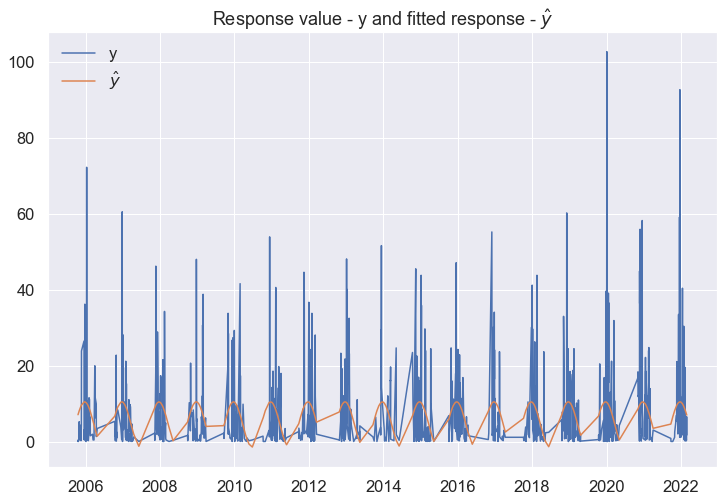

Model MSE: 130.199149150553


In [37]:
y_hat = np.matmul(Z, beta_hat)


plt.rcParams['figure.figsize'] =  [12, 8]
f, ax = plt.subplots(1, 1)

plt.plot(data.Date, y, label="y", linestyle="-")
plt.plot(data.Date, y_hat, label="$\hat{y}$", linestyle="-")
plt.title(r"Response value - y and fitted response - $\hat{y}$")
plt.legend()
plt.show()

print(f"Model MSE: {np.mean((y-y_hat)**2)}")

 - Test whether the fitted model significantly improves on the trival model $y_t = \beta'_0 + \epsilon_t$.

We'll use an F-test. First, let's find B0:

In [38]:
Z_trivial = np.vstack([np.ones_like(x1)]).T

A_trivial = np.dot(np.linalg.inv(np.dot(Z_trivial.T,Z_trivial)), Z_trivial.T)

beta_hat_trivial = np.dot(A_trivial, y)

y_hat_trivial = np.matmul(Z_trivial, beta_hat_trivial)

print(f"Model MSE: {np.mean((y-y_hat_trivial)**2)}")
print(f"beta_hat vector = {beta_hat_trivial}")

Model MSE: 137.0001349526039
beta_hat vector = [8.14226125]


In [40]:

ss_full = np.sum( (y-y_hat) **2 )
ss_sub = np.sum( (y-y_hat_trivial) **2 )

assert ss_full < ss_sub

p = 3
q = 1
n = len(y)

f = ( (n-p) * (ss_sub - ss_full) ) / ( (p-q) * ss_full )

p_value = 2*st.f.sf(f, dfn=p-q, dfd=n-p)

print(f"p_value of the F-test: {p_value}")
print("\nTherefore, it seems that the more complex model is significantly better and than the current (trivial) model.")
print("the trivial model doesn't provide a valid representation of the data compared to the original larger one.")

p_value of the F-test: 1.8272443527586088e-10

Therefore, it seems that the more complex model is significantly better and than the current (trivial) model.
the trivial model doesn't provide a valid representation of the data compared to the original larger one.


 
 - For each parameter $p$, report the P-value for testing $H_0\,:\,\hat{\beta}_p = 0$ and indicate whether this parameter is 
significantly different than $0$ at level $\alpha = 0.01$. 
(for this item, you can either evaluate everything from the formulas provded in class or use a statistical package like `statsmodels`)



In [41]:
residuals = y - y_hat
n = len(y)
p = 3
s = np.sqrt(np.sum( residuals**2 )) / np.sqrt(n-p)
feat_set = ["Intercept", "cos", "sin"]

p_values = np.array([])
for i, beta in enumerate(beta_hat):
    c = [0] * p
    c[i] = 1
    c_arr = np.array(c)
        
    numerator = beta - 0  # our hypothesis is that Beta_j = 0
    denominator = s * np.sqrt( c_arr.T @ np.linalg.inv(np.dot(Z.T, Z)) @ c_arr ) 
    
    t = numerator / denominator
    
    p_value = 2*st.t.sf(t, df=n-p)
    p_values = np.append(p_values, p_value)
    

p_values = [p_val if p_val <= 1 else 2-p_val for p_val in p_values] 

for feature, p_val in zip(feat_set, p_values):
    
    print(f"For feature: {feature}, this is the p-value: {p_val:.4f}, is significant = {p_val <= 0.01}")
    

For feature: Intercept, this is the p-value: 0.0000, is significant = True
For feature: cos, this is the p-value: 0.0000, is significant = True
For feature: sin, this is the p-value: 0.1181, is significant = False


Let's also use statmodels:

In [19]:
import statsmodels.formula.api as smf

model = smf.ols(formula="Rainfall ~  + x1 + x2", data=data).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Rainfall   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     23.66
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           9.63e-11
Time:                        14:24:16   Log-Likelihood:                -3510.6
No. Observations:                 911   AIC:                             7027.
Df Residuals:                     908   BIC:                             7042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5509      0.757      6.015      0.000       3.066       6.036
x1             5.8722      0.972      6.042      0.000       3.965       7.780
x2            -0.9131      0.622     -1.469      0.142      -2.133       0.307
==============================================================================
Omnibus:                      561.737   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5734.453
Skew:                           2.707   Prob(JB):                         0.00
Kurtosis:                      14.035   Cond. No.                         3.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Solution 1 - DONE

2) We would like to test whether future data follows a similar distribution to past data. Consider two datasets modeled by
$$
\begin{equation}
y = Z \beta + \epsilon,\qquad y_{new} = Z_{new} \beta + \epsilon_{new}
\label{eq:model} \tag{2}
\end{equation}
$$
where $Z \in \reals^{m\times p}$ and $Z_{new} \in \reals^{n\times p}$ are the given design matrices which both assume to have rank $p$. We also assume that $\epsilon$ and $\epsilon_{new}$ are independent. We will think of $(Z, y)$ as the initial data pair and $(Z_{new},y_{new})$ as the new data.

Let $\hat{\beta} = (Z \top Z)^{-1}Z^\top y$ be the usual least-squares (LS) estimate on the initial data. Define the predicted values as
 $$
 \hat{y}_{new} := Z_{new} \hat{\beta}
 $$
 (note that $\hat{y}_{new}$ is not the LS estiamte of $y_{new}$ from $Z_{new}$)
 

 - Show that $\mathrm{Cov}(y-\hat{y},y_{new} - \hat{y}_{new})=0$
 

#### Answer
</br>

We know that 
$$
\begin{align*}
\mathrm{Cov}(y-\hat{y}, y_{new} - \hat{y}_{new}) & =
\mathrm{Cov}(\hat{\epsilon}, Z_{new} \beta + \epsilon_{new} - Z_{new}\hat{\beta}) \\
& = \mathrm{Cov}(\hat{\epsilon}, \epsilon_{new} ) - \mathrm{Cov}(\hat{\epsilon}, Z_{new} \hat{\beta} )
\end{align*} 
$$

(where the last transition is beacuse that only $\hat{\beta}$, $\epsilon_{new}$, and $\hat{\epsilon}$ are random variable)
 <br>
 
$$
=
\mathrm(\hat{\epsilon}, \epsilon_{new}) - \mathrm(\hat{\epsilon}, \hat{\beta}) Z_{new}^T
$$

note that $\hat{\epsilon}$, $\hat{\beta}$, are indepndent, so their covariance is 0.  

-->

$$
=
\begin{align*}
\mathrm(\hat{\epsilon}, \epsilon_{new}) - \mathrm(\hat{\epsilon}, \hat{\beta}) Z_{new}^T = \mathrm(\hat{\epsilon}, \epsilon_{new}) - 0 = \mathrm{Cov}(Z \beta + \epsilon - Z \hat{\beta}, \epsilon_{new})
\end{align*} 
$$
Again, $Z \beta$ is not an RV, so:

$$
=
cov(\epsilon, \epsilon_{new}) - cov(Z \hat{\beta}, \epsilon_{new}) 
=
cov(\epsilon, \epsilon_{new}) - Z \cdot cov(\hat{\beta}, \epsilon_{new}) 
$$

We know that $\epsilon$, $\epsilon_{new}$, are indepndent, so their covariance is 0.  
-->

$$
=
-Z cov(\hat{\beta}, \epsilon_{new}) 
=
-Z cov((Z^t Z)^{-1} Z^T \cdot y, \epsilon_{new})
=
[-Z (Z^t Z)^{-1} Z^T] \cdot cov(y, \epsilon_{new})
=
[-Z (Z^t Z)^{-1} Z^T] \cdot cov(Z \beta + \epsilon, \epsilon_{new})
$$


Again, $Z \beta$ is not an RV, so:

$$
cov(y - \hat{y}, y_{new} - \hat{y}_{new})
=
[-Z (Z^t Z)^{-1} Z^T] \cdot cov(\epsilon, \epsilon_{new})
$$

We know that $\epsilon$, $\epsilon_{new}$, are indepndent, so their covariance is 0.  
-->

$$
cov(y - \hat{y}, y_{new} - \hat{y}_{new}) = 0
$$

DONE.
<br>
<br>
<br>
<br>

 - Assume $\epsilon_{new} \sim \Ncal(0,\sigma^2 I_n)$. Find a (symmetric, positive definite) matrix $M \in \reals^{n \times n}$ so that
 $$
 M(y_{new} - \hat{y}_{new}) \sim \Ncal(0, \sigma^2 I_n).
 $$
 

#### Answer
</br>


$$
y_{new} - \hat{y}_{new}
=
Z_{new} \beta + \epsilon_{new} - Z_{new} \hat{\beta}
$$

Also, we know that: 
$$
\hat{\beta} \sim \Ncal(\beta, \sigma^2 (Z^t Z)^{-1})
$$  
-->

$$
Z_{new} \hat{\beta} \sim \Ncal(Z_{new} \beta, Z_{new} \sigma^2 (Z^t Z)^{-1} Z_{new}^T)
$$  

Also, we know that: 
$$
\epsilon_{new} \sim \Ncal(0, \sigma^2 I)
$$
And that:
$$
cov(\epsilon_{new}, \hat{\beta}) = 0
$$  

Hence -->

$$
y_{new} - \hat{y}_{new}
\sim
\Ncal(0, \sigma^2 (I - Z_{new} (Z^t Z)^{-1} Z_{new}^T))
$$

-->

$$
M(y_{new} - \hat{y}_{new})
\sim
\Ncal(0, \sigma^2 M (I - Z_{new} (Z^t Z)^{-1} Z_{new}^T) M^T)
$$

-->

$$
\sigma^2 M (I - Z_{new} (Z^t Z)^{-1} Z_{new}^T) M^T = \sigma^2 I
$$  

-->

$$
M (I - Z_{new} (Z^t Z)^{-1} Z_{new}^T) M^T = I
$$  

Define
$$
R = I - Z_{new} (Z^t Z)^{-1} Z_{new}^T
$$

Finally,

$$
M \cdot R \cdot M^T = I
$$

DONE.
<br>
<br>
<br>
<br>

- Give the distribution of the ratio
$$
\begin{equation}
A:= \frac{\frac{1}{n}\left\| M(Y_{new} - \hat{Y}_{new})\right\|^2}{\frac{1}{m-d} \left\| Y  - \hat{Y} \right\|^2 }
\label{eq:A} \tag{3}
\end{equation}
$$
under the null hypothesis:
$$
H_0\,:\,\begin{cases} Y = Z \beta + \epsilon,\qquad Y_{new} = Z_{new} \beta + \epsilon_{new} \\
\epsilon \sim \Ncal(0, \sigma^2 I_m),\qquad \epsilon_{new} \sim \Ncal(0, \sigma^2 I_n) \\
\text{$\epsilon$ and $\epsilon_{new}$ are independent}
\end{cases}
$$


#### Answer

$$
\left\| M(Y_{new} - \hat{Y}_{new})\right\|^2
$$
is a sum of squares of normal RVs (from the last sections).  
-->
It's distributed with a $\chi^2$ distribution.

$$
\left\| Y  - \hat{Y} \right\|^2
$$ Are simply $\hat{\epsilon}$, which we know are normal RVs. 

So, same here
-->

It's distributed with a $\chi^2$ distribution.

To conclude,
-->
$$
A \sim F(n, m-d)
$$

<br>
<br>
<br>
<br>

We now consider implementing a series of hypothesis tests about whether daily rainfall is remaining consistent over the years or whether it is changing in some meaningful way. 

- For each of the years 2010, 2011,...,2021, repeat the following. Define a data matrix $Z$ using the features in $\eqref{eq:model}$ consisting of all dates prior to that year (so that for 2010, $Z$ will be
a data matrix for the years 2005–2009, for 2011, $Z$ will be the data for years 2005-2011, and
so on). Define the responses $y$ to consist of rainfall for the given years. Define the new data matrix $Z_{new} \in \reals^{n \times p}$ to consist of the $n$ days of measurements in the given year ($n\leq 366$) and the responses $y_{new}$ to be the rainfall in those days. For this data, compute the statistic $A$ in $\eqref{eq:A}$ and its p-value, that is, conditional on
$A = a$, report
$$
p := \Pr[A \geq a] \quad \text{under $H_0$}
$$

#### Answer
</br>


We'll first define helper functions:

In [42]:
import scipy



def get_M(Z, Z_new):    
    n = len(Z_new)
    I = np.identity(n)
        
    R = I - Z_new @ np.linalg.inv(Z.T @ Z) @ Z_new.T
    R_inv = np.linalg.inv(R)
        
    M = scipy.linalg.solve_continuous_are(a=np.zeros_like(I), b=I, r=R_inv, q=I)
    
    return M

def get_A_statistic(M, y, y_hat, y_new, y_new_hat):
    n = len(Z_new)
    m, p = Z.shape
    
    num = (1/n) * np.inner(M @ (y_new - y_new_hat), M @ (y_new - y_new_hat))
    denom = (1 / (m-p)) * np.inner(y - y_hat, y - y_hat)
    
    A_statistic = num / denom
    
    return A_statistic



# main loop
p_values = list()

for year in range(2010, 2022):
    prior_data = data[data["Year"] < year]  # the question has a mistake... the 2 examples of years are different, I chose it to be < year, not <= year.
    y = prior_data['Rainfall'].values
    Z = np.column_stack(
        (np.ones_like(y),
        prior_data["x1"].values,
        prior_data["x2"].values)
    )

    # get beta hat
    A = np.dot(np.linalg.inv(np.dot(Z.T, Z)), Z.T)
    beta_hat = np.dot(A, y)

    y_hat = Z @ beta_hat

    year_data = data[data["Year"] == year]
    y_new = year_data['Rainfall'].values
    Z_new = np.column_stack(
        (np.ones_like(y_new),
        year_data["x1"].values,
        year_data["x2"].values)
    )
    y_new_hat = Z_new @ beta_hat  # use the beta hat that was previously calculated

    M = get_M(Z, Z_new)

    A_stat = get_A_statistic(M, y, y_hat, y_new, y_new_hat)  # aka f statistic

    n = len(Z_new)
    m, p = Z.shape
    p_value = scipy.stats.f.sf(A_stat, n, m-p)
    
    p_values.append(p_value)

    print(f" For Year = {year}, A statistic = {A_stat:.4f}, and p-value = {p_value:.4f}\n")



 For Year = 2010, A statistic = 1.0865, and p-value = 0.3462

 For Year = 2011, A statistic = 0.9098, and p-value = 0.6740

 For Year = 2012, A statistic = 0.7333, and p-value = 0.9352

 For Year = 2013, A statistic = 1.7546, and p-value = 0.0024

 For Year = 2014, A statistic = 0.9294, and p-value = 0.6002

 For Year = 2015, A statistic = 0.9122, and p-value = 0.6708

 For Year = 2016, A statistic = 0.9938, and p-value = 0.4895

 For Year = 2017, A statistic = 0.4410, and p-value = 0.9985

 For Year = 2018, A statistic = 1.7328, and p-value = 0.0006

 For Year = 2019, A statistic = 0.4994, and p-value = 0.9995

 For Year = 2020, A statistic = 2.9155, and p-value = 0.0000

 For Year = 2021, A statistic = 2.1947, and p-value = 0.0000




Plot the P-values for each of the years and also print their values. Discuss briefly. 

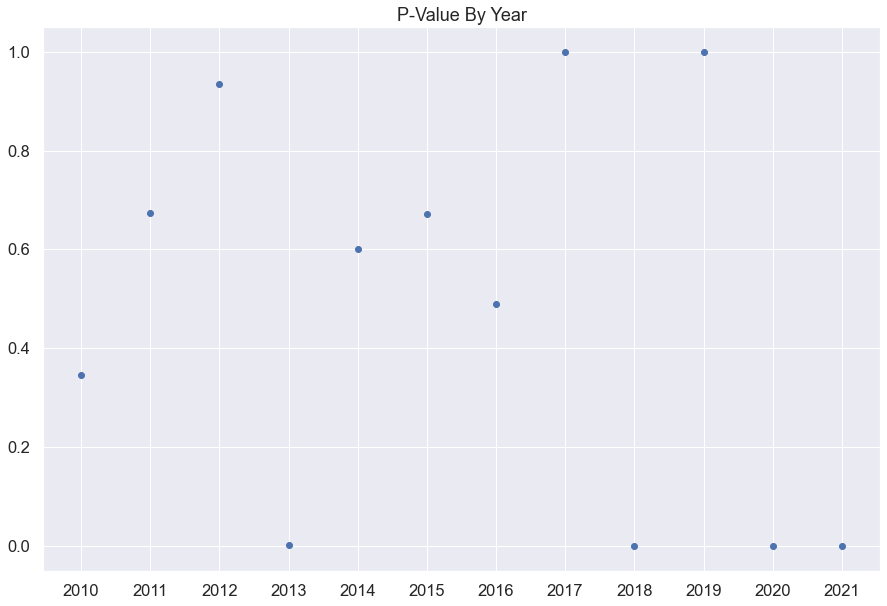

In [43]:
# plot

years_list = list(range(2010, 2022))

plt.rcParams['figure.figsize'] =  [15, 10]
f, ax = plt.subplots(1, 1)

plt.scatter(years_list, p_values)
plt.xticks(years_list)
plt.title("P-value by Year".title())

plt.show()

It seems that most of the p-values are not significant. However, there are some years with a very significant p-value (< 0.001) - 4 years to be exact.
SO - if we'll take each test seperately, with alpha = 0.05, we'll reject the null hypothisis for years 2013, 2018, 2020, 2021.
The p-values over time doesn't seem to have some kind of pattern to it.
<br>
<br>


- Suppose that you obtained a very small p-value of some year, say $p \approx 10^{-5}$. Does rejecting the null hypothesis necessarily mean that the distribution of rainfall is changing over time? explain in 2-3 sentences. 

#### Answer

NO. Let's start by pointing the definition of p-value:
it is the probability of obtaining the observed results or even more extreme, assuming that the null hypothesis is true. (in our case: Rainfall is not changing over time).
<br>
So, that's enough for the answer to be negative.
<br>
BUT - we need to point out another fact, and that's p-hacking. When you do a lot of tests (12 in our case), then it is more likely, that some test will result in a p-value under the alpha you defined. So, there is a need to be even more careful when connducting a lot of tests. 
<br>
There are a lot of ways to deal with them, for example, "normlizing" the p-values needed for rejecting the null hypothisis, or reporting an FDR value (False discovery rate).
<br>
<br>
<br>


3) Consider the total amount of rainfall within each month. Suppose that we assume that there is no change in the distribution over time across years, but we suspect that December is usuallly rainier than February. Design a test procedure that checks whether this is true. Use two apporaches:
 - Two-sample t-test 
 - Paired t-test 
 - Which approach seems more approproate here? 

#### Answer

First, we need to denote that it's not a two-sided test. We suspect that total_rainfall_december > total_rainfall_february.
<br>
Let's check that:

 - Two-sample t-test 
 

We can do it manually:

In [45]:
from scipy.stats import t

feb_data = data[data.Month == 2]
dec_data = data[data.Month == 12]

# group by year
feb_data_grouped_summed_yearly = feb_data.groupby("Year").sum().Rainfall.values
dec_data_grouped_summed_yearly = dec_data.groupby("Year").sum().Rainfall.values

# calc means
feb_total_rainfall_mean = feb_data_grouped_summed_yearly.mean()
dec_total_rainfall_mean = dec_data_grouped_summed_yearly.mean()

# calc stds
feb_total_rainfall_std = np.std(feb_data_grouped_summed_yearly)
dec_total_rainfall_std = np.std(dec_data_grouped_summed_yearly)

# calc dof
feb_n = len(feb_data_grouped_summed_yearly)
dec_n = len(dec_data_grouped_summed_yearly)
dof = feb_n + dec_n - 2

# calc t-statistic

s = np.sqrt(  ( ( (feb_n) * feb_total_rainfall_std**2) + ( (dec_n) * dec_total_rainfall_std**2 ) ) / dof )

t_statistic = abs( (dec_total_rainfall_mean - feb_total_rainfall_mean) / ( s * np.sqrt((1/dec_n) + (1/feb_n))))

# p_value
p_val = t.sf(t_statistic, dof)


print(f"In a Two-sample t-test, the t-statistic = {t_statistic:.3f}, p-value = {p_val:.4f}, hence, we reject H0")


In a Two-sample t-test, the t-statistic = 2.367, p-value = 0.0121, hence, we reject H0


We can also do it with scipy.stats:

In [46]:
from scipy.stats import ttest_ind as ttest

t_statistic, p_val = ttest(dec_data_grouped_summed_yearly, feb_data_grouped_summed_yearly, equal_var=False, alternative="greater")

print(f"In a Two-sample t-test, using scipy.stats the t-statistic = {t_statistic:.3f}, p-value = {p_val:.4f}, hence, we reject H0")


In a Two-sample t-test, using scipy.stats the t-statistic = 2.367, p-value = 0.0141, hence, we reject H0


 - Paired t-test 
 

In [47]:
from scipy.stats import ttest_rel as ttest_paired


t_statistic, p_val = ttest_paired(dec_data_grouped_summed_yearly, feb_data_grouped_summed_yearly, alternative="greater")

print(f"In a paired t-test, using scipy.stats the t-statistic = {t_statistic:.3f}, p-value = {p_val:.4f}, hence, we reject H0")

In a paired t-test, using scipy.stats the t-statistic = 2.138, p-value = 0.0241, hence, we reject H0


 - Which approach seems more approproate here? 

In general, paired t test is more powerfull, because we use more information that we have. The main upside of it comes from the fact that the samples each year might be dependant some how (for example, one year was extra rainy); In that case, a paired t-test is a stronger choice. On the other hand, most of the years wasn't significantly different than the one fore them, so it shouldn't be much of a difference between the 2 test types (there is, a small one though of 0.01 in the p-value). To conclude: I'd use a paired t-test, because I don't see a downside for it.